# Task2 数据读取与数据分析

## 读取数据

In [1]:
import pandas as pd

In [3]:
test_df=pd.read_csv('/Users/alice/Desktop/test_a.csv',sep='\t')
train_df=pd.read_csv('/Users/alice/Desktop/train_set.csv',sep='\t')

## 数据分析

### 句子长度分析

In [4]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。

(-100, 10000)

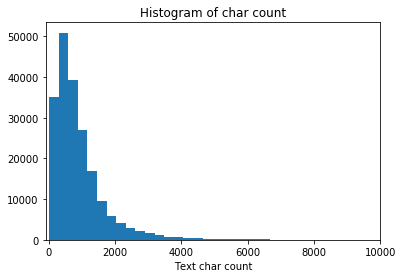

In [8]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")
plt.xlim(-100, 10000)

Text(0.5, 0, 'category')

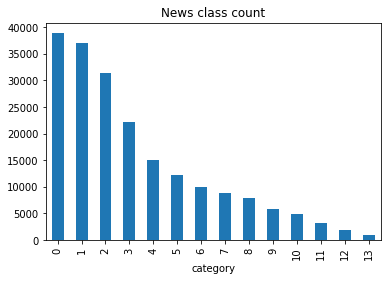

In [6]:

train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

### 字符分布统计

In [7]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))#将训练集中所有的句子进行拼接
word_count = Counter(all_lines.split(" "))  #统计字数
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))
# 6869

print(word_count[0])
# ('3750', 7482224)

print(word_count[-1])
# ('3133', 1)

6869
('3750', 7482224)
('3133', 1)


从统计结果中可以看出，在训练集中总共包括6869个字，其中编号3750的字出现的次数最多，编号3133的字出现的次数最少。

这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [9]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
# ('3750', 197997)

print(word_count[1])
# ('900', 197653)

print(word_count[2])
# ('648', 191975)

('3750', 197997)
('900', 197653)
('648', 191975)


## 作业还没做，先放着